In [110]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/countries-of-the-world/countries of the world.csv


In [128]:
df = pd.read_csv('/kaggle/input/countries-of-the-world/countries of the world.csv')
df.head()

,Country,Region,Population,Area (sq. mi.),Pop. Density (per sq. mi.),Coastline (coast/area ratio),Net migration,Infant mortality (per 1000 births),GDP ($ per capita),Literacy (%),Phones (per 1000),Arable (%),Crops (%),Other (%),Climate,Birthrate,Deathrate,Agriculture,Industry,Service
0,Afghanistan,ASIA (EX. NEAR EAST),31056997,647500,"48,0","0,00","23,06","163,07",700.0,"36,0","3,2","12,13","0,22","87,65",1,"46,6","20,34","0,38","0,24","0,38"
1,Albania,EASTERN EUROPE,3581655,28748,"124,6","1,26","-4,93","21,52",4500.0,"86,5","71,2","21,09","4,42","74,49",3,"15,11","5,22","0,232","0,188","0,579"
2,Algeria,NORTHERN AFRICA,32930091,2381740,"13,8","0,04","-0,39",31,6000.0,"70,0","78,1","3,22","0,25","96,53",1,"17,14","4,61","0,101","0,6","0,298"
3,American Samoa,OCEANIA,57794,199,"290,4","58,29","-20,71","9,27",8000.0,"97,0","259,5",10,15,75,2,"22,46","3,27",NaN,NaN,NaN
4,Andorra,WESTERN EUROPE,71201,468,"152,1","0,00","6,6","4,05",19000.0,"100,0","497,2","2,22",0,"97,78",3,"8,71","6,25",NaN,NaN,NaN


In [129]:
df.shape

(227, 20)

In [196]:
df = df[['Country', 'Region', 'Literacy (%)', 'GDP ($ per capita)']]
df['Literacy (%)'] = df['Literacy (%)'].str.split(',').str[0].astype('float32')
df.head()

,Country,Region,Literacy (%),GDP ($ per capita)
0,Afghanistan,ASIA (EX. NEAR EAST),36.0,700.0
1,Albania,EASTERN EUROPE,86.0,4500.0
2,Algeria,NORTHERN AFRICA,70.0,6000.0
3,American Samoa,OCEANIA,97.0,8000.0
4,Andorra,WESTERN EUROPE,100.0,19000.0


In [197]:
# Taking Countries from Asia
# df['Region'].str.split().apply(lambda x : 'ASIA' in x)
df_asia = df[df['Region'].str.contains('ASIA')]
df_asia = df_asia.reset_index().drop(columns='index')
df_asia

,Country,Region,Literacy (%),GDP ($ per capita)
0,Afghanistan,ASIA (EX. NEAR EAST),36.0,700.0
1,Bangladesh,ASIA (EX. NEAR EAST),43.0,1900.0
2,Bhutan,ASIA (EX. NEAR EAST),42.0,1300.0
3,Brunei,ASIA (EX. NEAR EAST),93.0,18600.0
4,Burma,ASIA (EX. NEAR EAST),85.0,1800.0
5,Cambodia,ASIA (EX. NEAR EAST),69.0,1900.0
6,China,ASIA (EX. NEAR EAST),90.0,5000.0
7,East Timor,ASIA (EX. NEAR EAST),58.0,500.0
8,Hong Kong,ASIA (EX. NEAR EAST),93.0,28800.0
9,India,ASIA (EX. NEAR EAST),59.0,2900.0


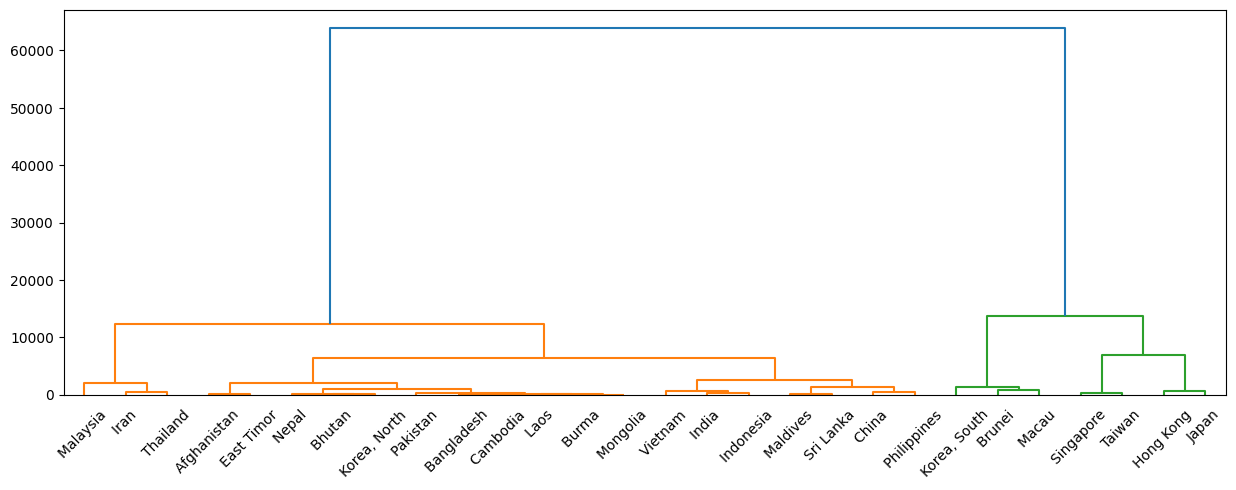

In [222]:
import matplotlib.pyplot as plt
import scipy.cluster.hierarchy as sch

data = df_asia[['GDP ($ per capita)', 'Literacy (%)']].values

plt.figure(figsize=(15,5))
plt.yscale('linear')
Z = sch.linkage(data, method='ward')
labels=df_asia['Country'].values
dendrogram = sch.dendrogram(Z, labels=labels)

plt.show()

### GDP is dominating over literacy, removing literacy doesnt affect the dendrogram
### Does scaling fix it ?

In [227]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
data_trf = scaler.fit_transform(data)
data_trf

array([[0.00706714, 0.        ],
       [0.04946996, 0.11111111],
       [0.02826855, 0.0952381 ],
       [0.63957597, 0.9047619 ],
       [0.0459364 , 0.77777778],
       [0.04946996, 0.52380952],
       [0.1590106 , 0.85714286],
       [0.        , 0.34920635],
       [1.        , 0.9047619 ],
       [0.08480565, 0.36507937],
       [0.09540636, 0.80952381],
       [0.22968198, 0.68253968],
       [0.97879859, 1.        ],
       [0.02826855, 1.        ],
       [0.61130742, 0.96825397],
       [0.04240283, 0.47619048],
       [0.66784452, 0.92063492],
       [0.30035336, 0.82539683],
       [0.12014134, 0.96825397],
       [0.0459364 , 0.96825397],
       [0.03180212, 0.14285714],
       [0.0565371 , 0.14285714],
       [0.14487633, 0.88888889],
       [0.81978799, 0.88888889],
       [0.1130742 , 0.88888889],
       [0.80918728, 0.95238095],
       [0.24381625, 0.88888889],
       [0.07067138, 0.85714286]])

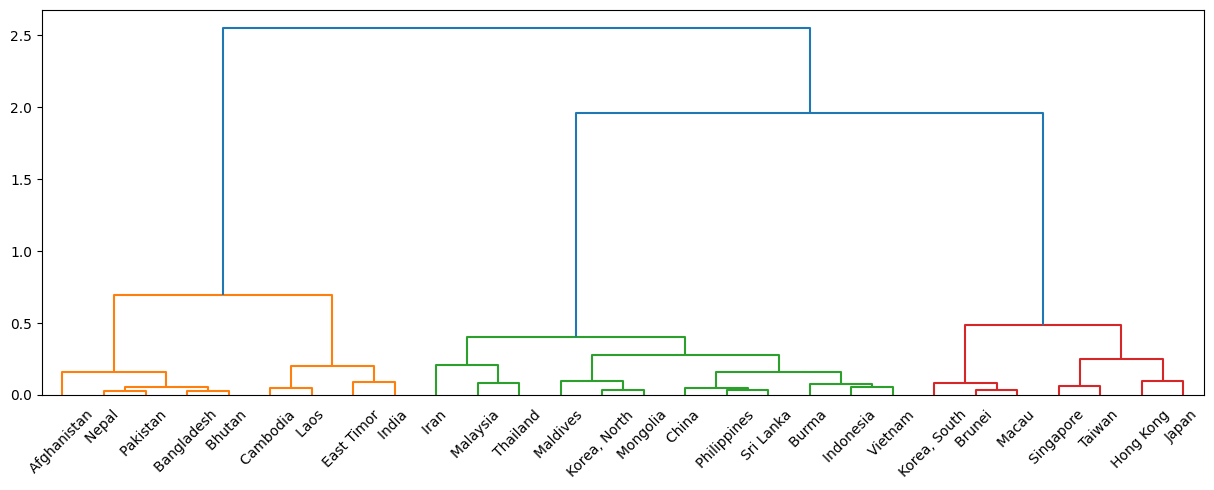

In [229]:
plt.figure(figsize=(15,5))
Z = sch.linkage(data_trf, method='ward')
labels=df_asia['Country'].values
dendrogram = sch.dendrogram(Z, labels=labels)

plt.show()

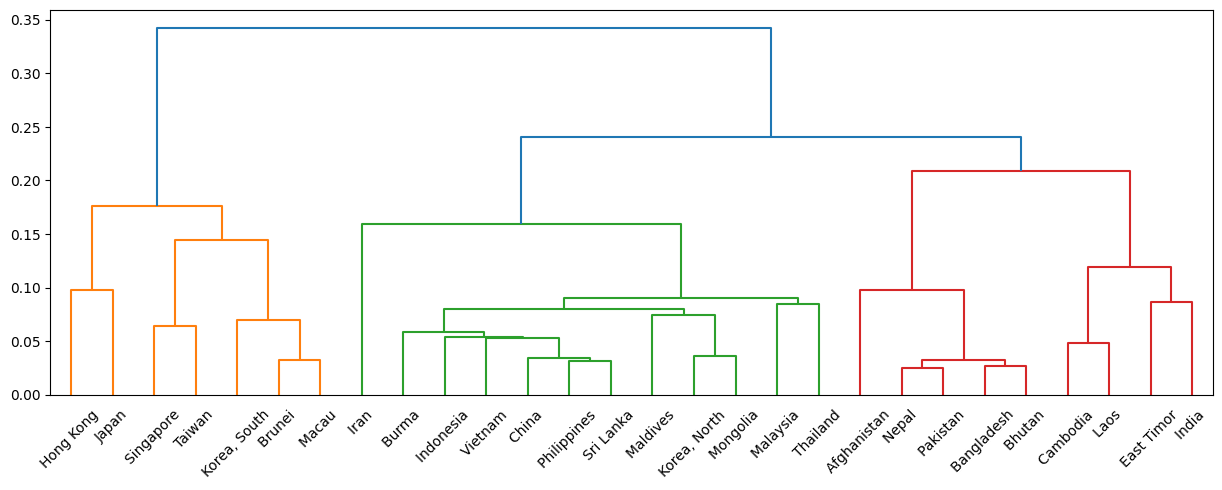

In [228]:
plt.figure(figsize=(15,5))
Z = sch.linkage(data_trf, method='single')
labels=df_asia['Country'].values
dendrogram = sch.dendrogram(Z, labels=labels)

plt.show()

In [234]:
from sklearn.cluster import AgglomerativeClustering

agc = AgglomerativeClustering(n_clusters=2, linkage='ward')
clusters = agc.fit_predict(data)
clusters

array([1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1,
       1, 0, 1, 0, 1, 1])

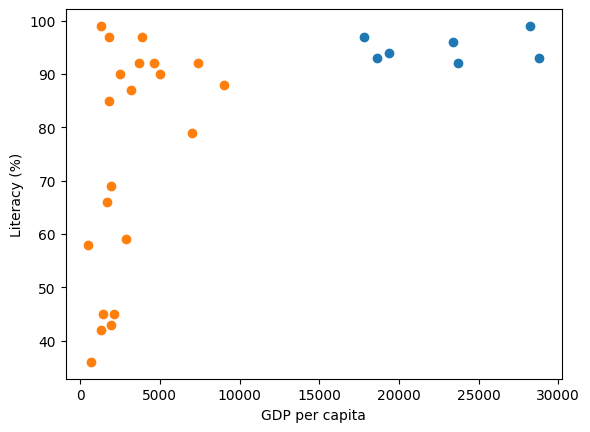

In [233]:
plt.scatter(data[clusters==0,0], data[clusters==0,1])
plt.scatter(data[clusters==1,0], data[clusters==1,1])
plt.xlabel('GDP per capita')
plt.ylabel('Literacy (%)')
plt.show()

In [242]:
df = pd.read_csv('/kaggle/input/countries-of-the-world/countries of the world.csv')

df_world = df[['Country', 'Region', 'Literacy (%)', 'GDP ($ per capita)']]
df_world.loc[:, 'Literacy (%)'] = df_world['Literacy (%)'].str.split(',').str[0].astype('float32')
df_world.head()

,Country,Region,Literacy (%),GDP ($ per capita)
0,Afghanistan,ASIA (EX. NEAR EAST),36.0,700.0
1,Albania,EASTERN EUROPE,86.0,4500.0
2,Algeria,NORTHERN AFRICA,70.0,6000.0
3,American Samoa,OCEANIA,97.0,8000.0
4,Andorra,WESTERN EUROPE,100.0,19000.0


In [251]:
data_world = df_world[['GDP ($ per capita)', 'Literacy (%)']].values

# data_world_trf = scaler.fit_transform(data_world)

# plt.figure(figsize=(15,5))
# Z = sch.linkage(data_world_trf, method='ward')
# labels=df_asia['Country'].values
# dendrogram = sch.dendrogram(Z, labels=labels)

# plt.show()

In [260]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer()
data_world = imputer.fit_transform(data_world)

In [276]:
from sklearn.cluster import AgglomerativeClustering

agc = AgglomerativeClustering(n_clusters=3, linkage='single')
clusters = agc.fit_predict(data_world)
clusters

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2])

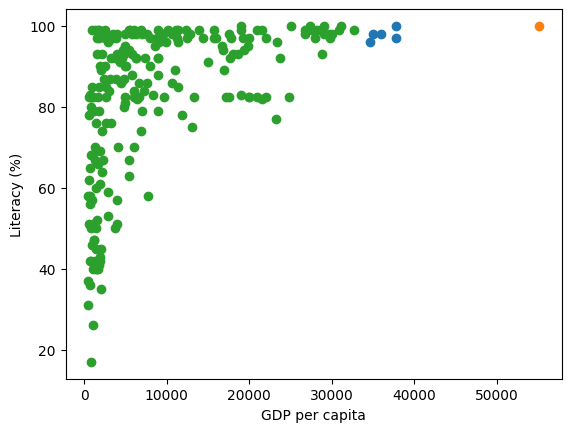

In [277]:
plt.scatter(data_world[clusters==0,0], data_world[clusters==0,1])
plt.scatter(data_world[clusters==1,0], data_world[clusters==1,1])
plt.scatter(data_world[clusters==2,0], data_world[clusters==2,1])
plt.xlabel('GDP per capita')
plt.ylabel('Literacy (%)')
plt.show()

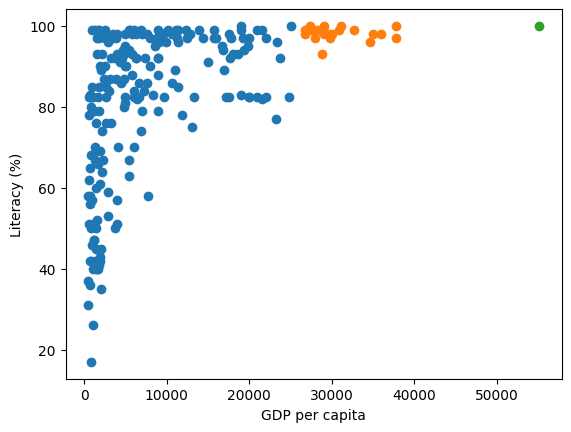

In [285]:
agc = AgglomerativeClustering(n_clusters=3, linkage='complete')
clusters = agc.fit_predict(data_world)

plt.scatter(data_world[clusters==0,0], data_world[clusters==0,1])
plt.scatter(data_world[clusters==1,0], data_world[clusters==1,1])
plt.scatter(data_world[clusters==2,0], data_world[clusters==2,1])
plt.xlabel('GDP per capita')
plt.ylabel('Literacy (%)')
plt.show()

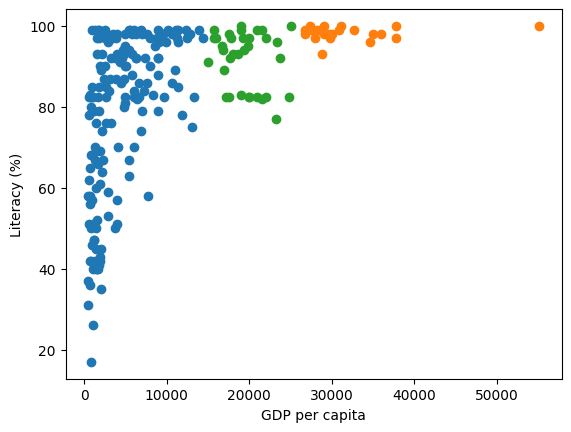

In [286]:
agc = AgglomerativeClustering(n_clusters=3, linkage='ward')
clusters = agc.fit_predict(data_world)

plt.scatter(data_world[clusters==0,0], data_world[clusters==0,1])
plt.scatter(data_world[clusters==1,0], data_world[clusters==1,1])
plt.scatter(data_world[clusters==2,0], data_world[clusters==2,1])
plt.xlabel('GDP per capita')
plt.ylabel('Literacy (%)')
plt.show()

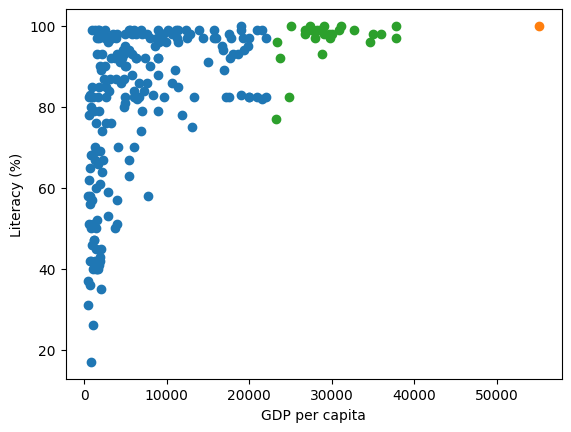

In [287]:
agc = AgglomerativeClustering(n_clusters=3, linkage='average')
clusters = agc.fit_predict(data_world)

plt.scatter(data_world[clusters==0,0], data_world[clusters==0,1])
plt.scatter(data_world[clusters==1,0], data_world[clusters==1,1])
plt.scatter(data_world[clusters==2,0], data_world[clusters==2,1])
plt.xlabel('GDP per capita')
plt.ylabel('Literacy (%)')
plt.show()

In [292]:
df[df['GDP ($ per capita)'] >50000]

,Country,Region,Population,Area (sq. mi.),Pop. Density (per sq. mi.),Coastline (coast/area ratio),Net migration,Infant mortality (per 1000 births),GDP ($ per capita),Literacy (%),Phones (per 1000),Arable (%),Crops (%),Other (%),Climate,Birthrate,Deathrate,Agriculture,Industry,Service
121,Luxembourg,WESTERN EUROPE,474413,2586,"183,5","0,00","8,97","4,81",55100.0,"100,0","515,4","23,28","0,4","76,32",NaN,"11,94","8,41","0,01","0,13","0,86"
